<a href="https://colab.research.google.com/github/Usermer/TPs-Technologies-Intelligence-1rtificielle/blob/main/TP2__deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercice 1 : Reconnaissance de chiffres manuscrits (MNIST)**

ETAPE 1.Importer les *bibliotheques*

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as pkt
import numpy as np



1.   La différence entre `TensorFlow` et *`Keras`*







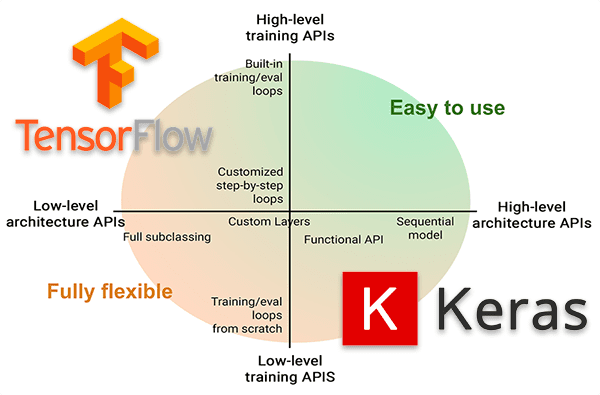



*  ***`Tensorflow`*** est une bibliothèque bas niveau qui permet de faire des calculs rapides , constuire des ***réseaux de neurones complexes***, faire le ***backpropagation***..
Tensorflow est donc puissant,bas-niveau et flexible , mais difficile et complexe à manipuler



*  ***`Keras`*** au contraire est une couche d'abstraction au-dessus de Tensorflow , elle ne fait pas les calculs elle meme mais elle oriente tensorflow sur quoi faire , donc c'est une interface de hait-niveau qui nous permet de construire et d'entrainer des réseaux plus facilement , sans se soucier des details intermnes de tensorflow.




**2-La couche `Flatten`**


La couche `Flatten` est une couche de Keras utilisée pour transformer les données d'entrée (tenseur) multi-dimensionnelles (comme les images qui ont une hauteur et une largeur) en un tableau unidimensionnel (plat). Elle est souvent utilisée comme première couche dans un réseau de neurones dense (fully connected) car ces couches attendent généralement des données d'entrée sous forme de vecteur unidimensionnel.

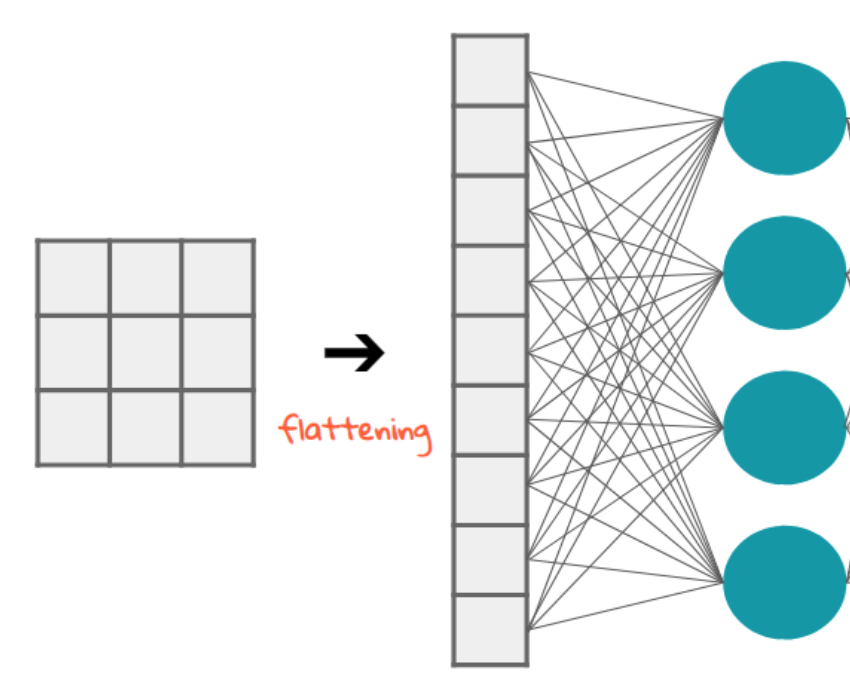

In [ ]:
from IPython.display import display, Image

display(Image('/content/images/flatten.png',width=300))


3.La version de tensorflow installée sur la machine est : **2.19.0**

In [ ]:
print("Tensoflow version:",tf.__version__)

Tensoflow version: 2.19.0


**4.L'utilité de `Sequential` et `dense`**

l'API sequential


**`Sequential`** : L'API Sequential de Keras est un moyen simple de construire des modèles de réseaux de neurones où les couches sont empilées séquentiellement. C'est l'option la plus courante pour la plupart des problèmes où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie. On peut voir un modèle Sequential comme une "pile" de couches.


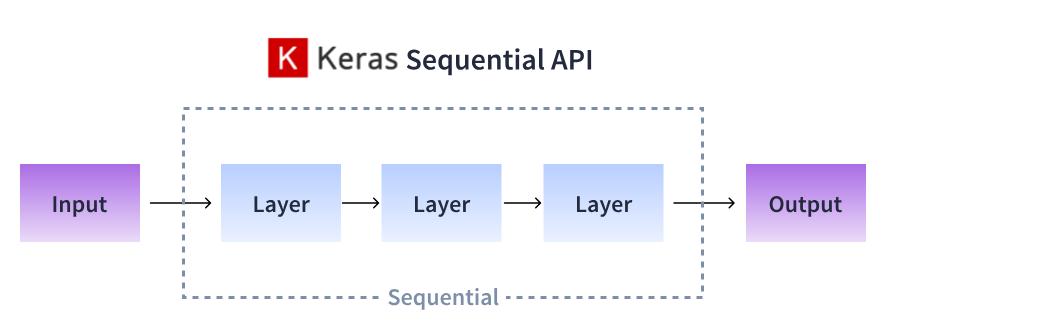

In [ ]:
display(Image('/content/images/seq.png',width=300))


**`Dense`** : Une couche `Dense` (ou Fully Connected layer) est une couche de réseau de neurones où chaque neurone de la couche est connecté à chaque neurone de la couche précédente.

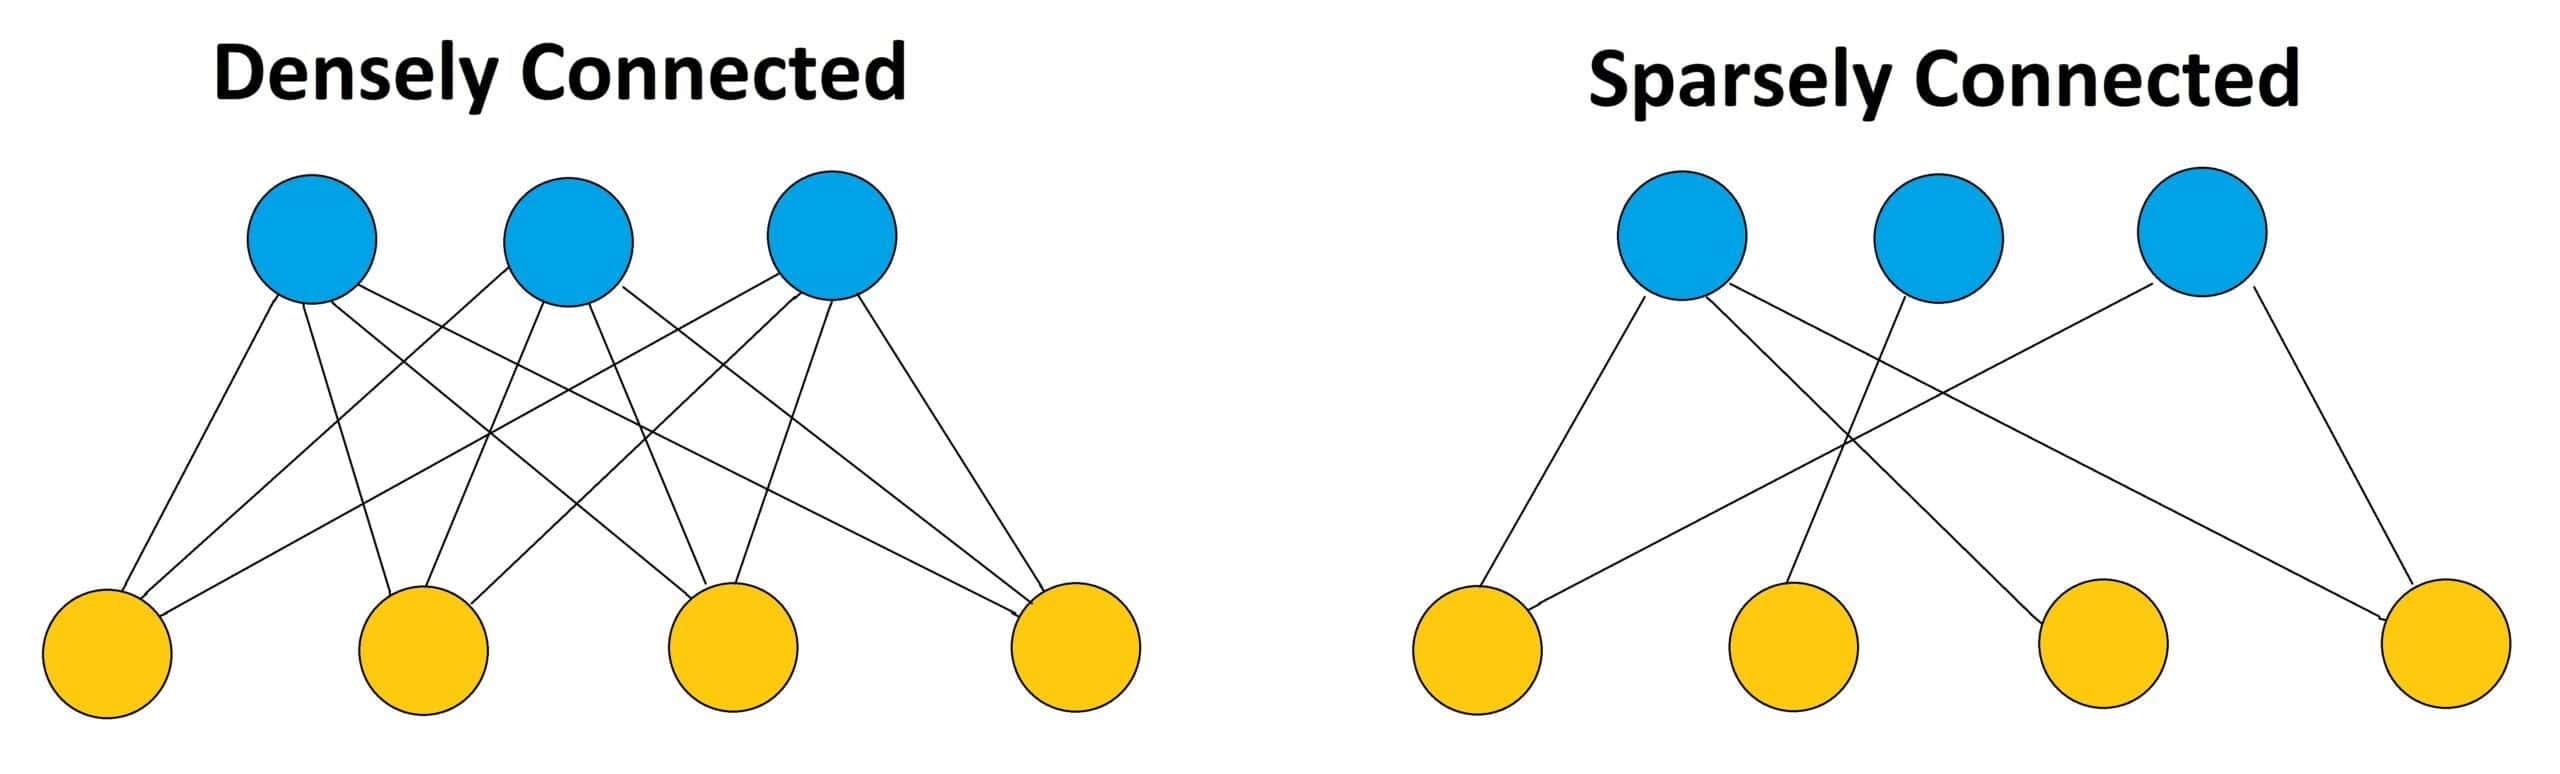

In [ ]:
display(Image('/content/images/dense.jpg',width=300))

# **ETAPE 2:Chargement et préparation du dataset**

Le dataset `MNIST` est composé de 70 000 images au total. Chaque image est une image en niveaux de gris de 28x28 pixels, où chaque pixel a une intensité comprise entre 0 (blanc) et 255 (noir).

Le dataset est déjà divisé en deux parties : un **ensemble d'entraînement** contenant **60 000**  images et un ensemble de test contenant **10 000** images.

In [ ]:
mnist=mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Normalisation
X_train=X_train/255
X_test=X_test/255

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

print("type:",X_train.dtype)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
type: float64


1. Pourquoi **normalise**-t-on les valeurs des pixels ?

les réseaux de neurones apprennent beaucoup mieux quand les entrées sont dans une plage de valeurs cohérente et petite, souvent entre 0 et 1, ou -1 et 1.

**Sans normalisation** :

Les valeurs des pixels vont de 0 à 255,

Les gradients deviennent très grands ou très petits -> apprentissage instable, plus lent, voire bloqué.

**Avec normalisation :**

On divise chaque pixel par 255 -> toutes les valeurs sont entre 0 et 1,

Le réseau apprend plus vite, plus stablement, et les poids convergent mieux.


2. Quelle est la taille d’une image et son type de données ?

La taille d'une image est de **28x28 **pixels.

Le type de données des pixels après normalisation est **float64**.

3. Combien d’exemples contient le jeu d’entraînement ?
Le jeu d'entraînement contient **60 000 exemples.**

# **ETAPE 3. Visualisation d’échantillons**

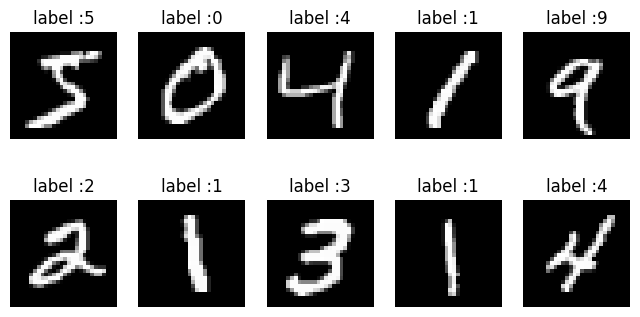

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(f"label :{y_train[i]}")
  plt.axis('off')
plt.tight_layout
plt.show()

D'après le plot ci-dessus on constate que les labels correspondent bien au images

**1.Quelle commande permet de modifier le nombre d’images affichées ?**

Dans la commande **`plt.subplot`**(**nrows**, **ncols**, **index**), on a nrows est le nombre de lignes et ncols est le nombre de colonnes de la grille de sous-graphiques. Le produit de nrows et ncols détermine le nombre total de positions disponibles pour les images.

Donc pour modifier le nombre d'images et les affichées correctement , il faut que les nombres d'images affichées par la boucle for soit inférieur ou égale nrows*,ncols

**2.Que représente l'argument `cmap='gray'` ?**

Dans la fonction `plt.imshow()`, l'argument `cmap` spécifie la **colormap** (carte de couleurs) à utiliser pour afficher l'image. `cmap='gray'` indique que l'image doit être affichée en niveaux de gris. Étant donné que les images MNIST sont  en niveaux de gris (avec des valeurs de pixels allant de 0 à 255), utiliser la colormap 'gray' permet de visualiser l'image dans son format original, où les valeurs plus basses sont affichées en noir et les valeurs plus élevées en blanc (ou inversement, selon la configuration exacte de la colormap 'gray').

**Quelle utilité a cette étape dans un projet d’IA ?**

L'exploration des données (comme la visualisation d'échantillons) est une étape primordiale dans un projet d'IA car elle permet d'avoir une idée générale et de comprendre la nature des données.

# **ETAPE 4. Construction du modèle de réseau de neurones**

In [ ]:
model=Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

1. Combien de paramètres le modèle contient-il ?


***Méthode 1:***
pour connaitre le nomber de parametres dans le modèle , il suffit d'utiliser la méthode `model.summary()`


---


***Méthode 2:calcul***

-**layer1**:Flatten :transform mon input (28,28) en un vecteur de taille 28*28=784

et elle n'admet pas de parametres

-***layer2*** : dense(128,activation="relu")

nbr_params=(nb_input*nb_neurones)+nb_neurones

(le +nb_neurones correspond aux biais)

**nombre de parametres=(784*128)+128=100,480**

-**layer3**:Dense(10, activation='softmax')

**nbr_params=128*10+10=1290**


**total=100480+1290=101770**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**2.Quelle est la fonction d’activation utilisée dans la couche de sortie ? Pourquoi ?**


**Fonction d'activation de la couche de sortie : Softmax**

Dans la couche de sortie du modèle (`Dense(10, activation='softmax')`), la fonction d'activation utilisée est **Softmax**.

**Pourquoi Softmax ?**

Ce modèle a pour but de reconnaître des chiffres manuscrits de 0 à 9. Il y a donc **10 classes possibles** . Pour un exemple d'image donné, le modèle doit prédire la probabilité que l'image appartienne à chacune de ces 10 classes.

La fonction Softmax est idéale pour les problèmes de **classification multi-classe** (où une seule classe doit être prédite parmi plusieurs). Elle prend en entrée un vecteur de scores (les sorties brutes des neurones de la couche Dense) et le transforme en un vecteur de probabilités.


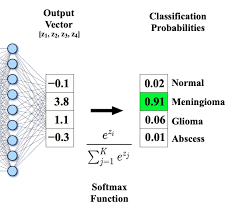

In [ ]:
display(Image('/content/images/softmax.png'))

3. **Quelle est la différence entre ReLU et Softmax ?**

**Différence entre ReLU et Softmax**

**ReLU (Rectified Linear Unit)** et **Softmax** sont deux fonctions d'activation couramment utilisées dans les réseaux de neurones, mais elles servent des objectifs différents et sont généralement placées à des endroits différents dans l'architecture du réseau.

**ReLU :**

*   **Fonction :** $f(x) = \max(0, x)$
*   **Sortie :** Pour une entrée donnée $x$, la sortie est $x$ si $x > 0$, et 0 si $x \le 0$. Elle introduit de la non-linéarité dans le réseau.
*   **Utilisation typique :** Principalement utilisée dans les **couches cachées** des réseaux de neurones (comme dans notre modele `Dense(128, activation='relu')`). Elle aide le réseau à apprendre des motifs complexes en introduisant des non-linéarités, ce qui est essentiel pour modéliser des relations non linéaires dans les données. Elle est populaire pour sa simplicité et son efficacité computationnelle.
*   **Interprétation :** La sortie n'est pas une probabilité et peut être n'importe quelle valeur positive.

**Softmax :**

*   **Fonction :** Convertit un vecteur de nombres réels en une distribution de probabilités. Pour un vecteur d'entrée $z = [z_1, z_2, ..., z_K]$, la sortie Softmax pour l'élément $i$ est $P(y=i | z) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$.
*   **Sortie :** Produit un vecteur de valeurs comprises entre 0 et 1, dont la somme est égale à 1. Chaque valeur peut être interprétée comme la probabilité que l'entrée appartienne à une classe particulière.
*   **Utilisation typique :** Exclusivement utilisée dans la **couche de sortie** des réseaux de neurones pour les problèmes de **classification multi-classe** (comme la reconnaissance de chiffres MNIST).
*   **Interprétation :** La sortie est une distribution de probabilités sur les classes possibles.

**En résumé :**

*   **ReLU** est une fonction d'activation non linéaire simple utilisée dans les **couches cachées**pour permettre au réseau d'apprendre des relations complexes.
*   **Softmax** est une fonction d'activation utilisée dans la **couche de sortie** pour transformer les scores bruts en une distribution de probabilités sur les classes, ce qui est nécessaire pour la classification multi-classe.

On ne les utilise généralement pas de manière interchangeable ; elles ont des rôles complémentaires dans l'architecture d'un réseau de neurones pour la classification.

# **Etape5. Compilation du modèle**

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**1.Qu'est-ce qu'un optimiseur ?**

Un **optimiseur** est un algorithme qui permet modifier les attributs du réseau de neurones, tels que les **poids** et les **biais**, afin de réduire les pertes (l'erreur) du modèle. En d'autres termes, son but est de trouver les meilleurs poids et biais possibles pour que le modèle fasse les prédictions les plus précises.


**2.Pourquoi utilise-t-on une fonction de perte ?**


La **fonction de perte** est une fonction qui permet de :
1. **Mesurer l'erreur :** Le rôle principal d'une fonction de perte est de quantifier la différence entre la sortie prédite par le modèle et la sortie réelle attendue.
2.  **Guider l'apprentissage :** La valeur de la fonction de perte est utilisée par l'optimiseur (comme Adam) pour savoir dans quelle mesure et dans quelle direction les poids et les biais du modèle doivent être ajustés. L'objectif de l'entraînement est de minimiser cette fonction de perte. Plus la perte est faible, plus les prédictions du modèle sont proches des valeurs réelles.
3.  **Évaluer les performances :** Pendant et après l'entraînement, la valeur de la fonction de perte donne une indication de la performance globale du modèle.

Dans notre cas, pour la classification multi-classe comme MNIST, on a utilisé `sparse_categorical_crossentropy`. Cette fonction de perte est bien adaptée car elle mesure l'erreur entre la distribution de probabilité prédite par le modèle (sortie par la couche softmax) et la classe réelle de l'image.


3.**Que se passe-t-il si on change la fonction de perte ?**

Si on change la fonction de perte on modifie l'objectif d'apprentissage du modèle et la manière dont il ajuste ses paramètres. c'est pour cela ,il est essentiel de choisir une fonction de perte qui correspond au type de problème (classification, régression) et à la nature des données pour assurer un entraînement efficace et de bonnes performances du modèle.

**4.Quelle serait la conséquence d’un mauvais choix d’optimiseur ?**

le choix de l'optimiseur est crucial car il détermine comment le modèle ajuste ses poids pour minimiser la perte. Un mauvais choix peut entraîner une convergence lente ou instable, un blocage dans des minima locaux, des performances sous-optimales, et une sensibilité accrue aux hyperparamètres.

**5.Quelle est la différence entre loss et metrics ?**

**Loss** : est la mesure que le modèle **minimise** pendant l'entraînement. C'est le signal d'erreur que l'optimiseur utilise pour ajuster les poids et les biais du réseau via la rétropropagation.

**Metrics :** Les métriques sont utilisées pour **surveiller et évaluer** la performance du modèle d'une manière qui est généralement plus intuitive et facile à interpréter pour les humains. Elles ne sont pas nécessairement utilisées pour le calcul du gradient et l'optimisation directe.

# **Etape6. Entraînement du modèle**

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test,y_test),
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8780 - loss: 0.4306 - val_accuracy: 0.9594 - val_loss: 0.1350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9637 - loss: 0.1234 - val_accuracy: 0.9674 - val_loss: 0.1065
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9781 - loss: 0.0733 - val_accuracy: 0.9733 - val_loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9837 - loss: 0.0551 - val_accuracy: 0.9784 - val_loss: 0.0702
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9777 - val_loss: 0.0730


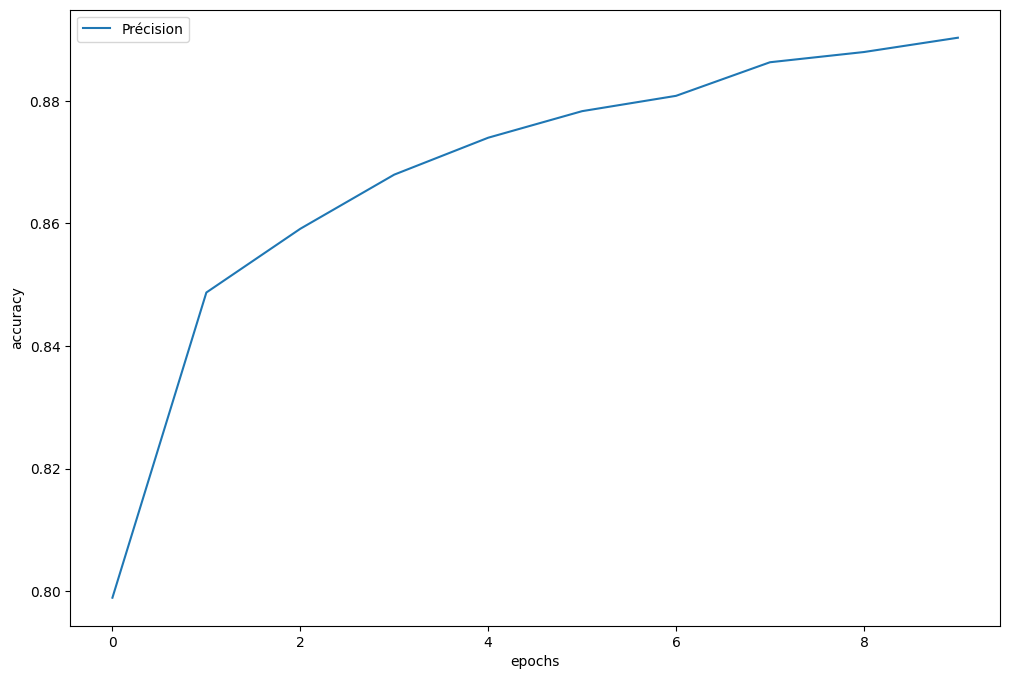

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='Précision')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

D'après le graphe , on constate que la précision augmente.Cela indique que le modèle apprend bien sur les données d'entraînement.

**1. Que représente une “époque” ?**

Dans le contexte de l'entraînement d'un réseau de neurones, une **époque** représente un **cycle complet d'entraînement** sur l'ensemble de données d'entraînement.

Cela signifie que pendant une époque, le réseau de neurones "voit" et traite **tous** les exemples du jeu de données d'entraînement une seule fois. Le processus d'une époque typique comprend :

1.  La division de l'ensemble d'entraînement en lots (batches) de données (comme spécifié par `batch_size`).
2.  Le passage en avant (forward pass) de chaque lot à travers le réseau pour obtenir des prédictions.
3.  Le calcul de la perte (erreur) entre les prédictions et les labels réels pour chaque lot.
4.  Le calcul des gradients de la perte par rapport aux poids du modèle via la rétropropagation.
5.  La mise à jour des poids du modèle par l'optimiseur en utilisant ces gradients.

Ce cycle est répété pour chaque lot jusqu'à ce que tous les exemples du jeu de données d'entraînement aient été utilisés. Une fois que tous les lots ont été traités, une époque est terminée.


**2. Pourquoi utilise-t-on un jeu de validation ?**

On utilise un jeu de validation pour évaluer les performances du modèle pendant l'entraînement sur des données qu'il n'a pas utilisées pour apprendre. Cela aide à surveiller la progression, à détecter le surapprentissage (lorsque le modèle devient trop spécifique aux données d'entraînement), à ajuster les hyperparamètres et à décider quand arrêter l'entraînement pour garantir que le modèle généralise bien à de nouvelles données.

**3. Que se passerait-il si on augmentait le nombre d’époques à 50 ?**

Augmenter le nombre d'époques à 50 permettrait au modèle de continuer à apprendre en améliorant encore ses performances. Cependant, cela augmente aussi significativement le risque de **surapprentissage** (overfitting), où le modèle devient trop spécialisé dans les données d'entraînement et perd sa capacité à bien généraliser à de nouvelles images.

# **Etape 7. Évaluation du modèle**

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("Test loss:",test_loss)
print("Test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0859
Test loss: 0.07299856841564178
Test accuracy: 0.9776999950408936


**1. Quelle est la précision finale de votre modèle ?**

la précision finale du modèle est:0.977

***2. Pourquoi la précision du test est souvent inférieure à celle d’entraînement ?***

La précision du test est souvent inférieure à celle d'entraînement car le modèle apprend spécifiquement des données d'entraînement et peut ne pas bien généraliser à des données invisibles. Un écart important indique un surapprentissage, où le modèle a mémorisé les données d'entraînement au lieu d'apprendre les motifs généralisables, ce qui dégrade ses performances sur de nouvelles données.

**3. Que faire si le modèle surapprend (overfitting) ?**

Dans le cas de surapprentissage, on peut augmenter la quantité de données, réduire la complexité du modèle, utiliser des techniques de régularisation comme le Dropout, implémenter l'arrêt précoce basé sur les performances de validation, ou encore recourir à l'augmentation de données pour enrichir l'ensemble d'entraînement. Combiner ces approches est souvent la stratégie la plus efficace.

# **Etape 8. Visualisation des performances**

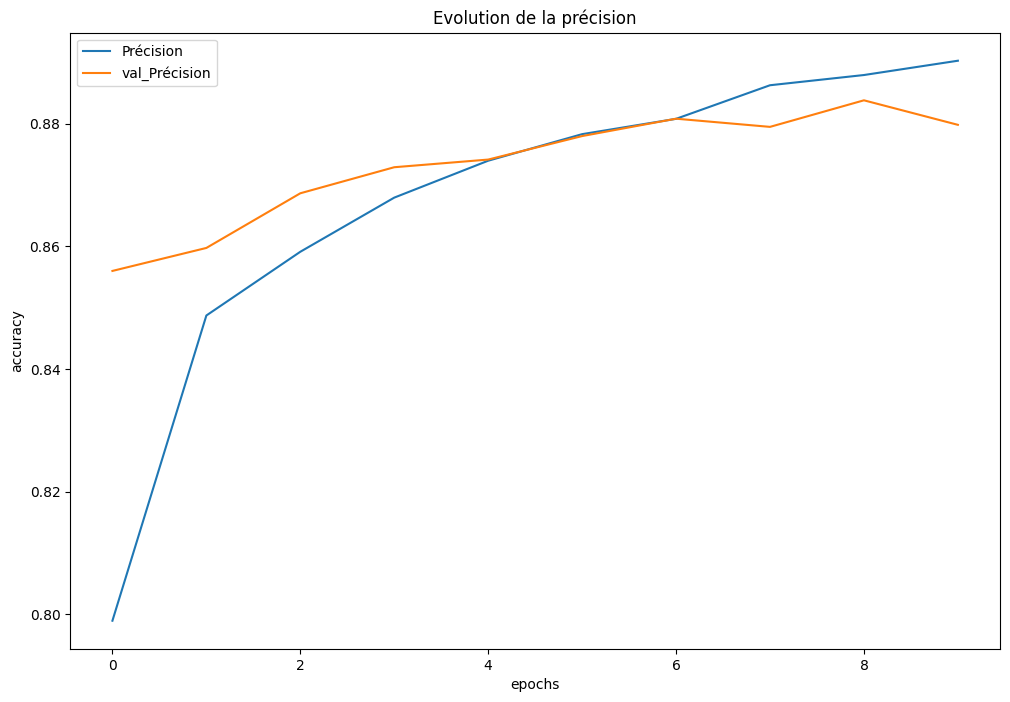

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='Précision')
plt.plot(history.history['val_accuracy'],label='val_Précision')
plt.title("Evolution de la précision")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**1. Que remarquez-vous sur les deux courbes ?**

On remarque que les deux courbes augmentent de manière continu dans les premières époques. Vers la fin de l'entraînement (époques 6 et 8), la précision d'entraînement continue d'augmenter, tandis que la précision de validation semble légèrement stagner voire diminuer très légèrement à la dernière époque.

**2. Comment détecter visuellement un surapprentissage ?**


Dans un **apprentissage norma**l : les courbes de performance d'entraînement et de validation devraient s'améliorer ensemble au fil des époques (la perte diminue, la précision augmente). Elles peuvent être très proches ou avoir un léger écart, avec la performance d'entraînement légèrement meilleure.et à un certain point, les deux courbes peuvent atteindre un plateau. Cela signifie que le modèle a appris tout ce qu'il pouvait avec l'architecture et les données actuelles.

**Surapprentissage** :c'est lorsque la performance sur l'ensemble d'entraînement continue de s'améliorer (la perte d'entraînement continue de diminuer, la précision d'entraînement continue d'augmenter), mais que la performance sur l'ensemble de validation commence à se dégrader (la perte de validation commence à augmenter, la précision de validation commence à diminuer). Il y a une divergence claire entre les deux courbes. Le modèle devient trop "spécialisé" dans les données d'entraînement et perd sa capacité à bien généraliser.

3. Quelle stratégie pourrait-on utiliser pour y remédier ?

**3. Quelle stratégie pourrait-on utiliser pour y remédier ?**

Si l'on détecte un surapprentissage  plusieurs stratégies peuvent être appliquées pour aider le modèle à mieux généraliser :

1.  **Ajouter du Dropout :** C'est une technique de régularisation très efficace qui désactive aléatoirement des neurones pendant l'entraînement, empêchant le réseau de devenir trop dépendant de chemins spécifiques et forçant l'apprentissage de représentations plus robustes.
2.  **Utiliser l'Arrêt Précoce (Early Stopping) :** C'est une méthode simple et efficace. Elle consiste à surveiller la performance sur le jeu de validation pendant l'entraînement et à arrêter l'entraînement dès que cette performance cesse de s'améliorer (ou commence à se dégrader). Cela permet d'arrêter l'entraînement au point où le modèle généralise le mieux, avant que le surapprentissage ne devienne trop important.
3.  **Régularisation L1/L2 :** Ajouter une pénalité aux poids du modèle peut aussi aider à réduire le surapprentissage en décourageant les poids trop élevés.
4.  **Simplifier le Modèle :** Si l'architecture du modèle est trop complexe pour la quantité de données, on pourrait réduire le nombre de neurones ou de couches.



**Etape 9. Prédictions et visualisation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


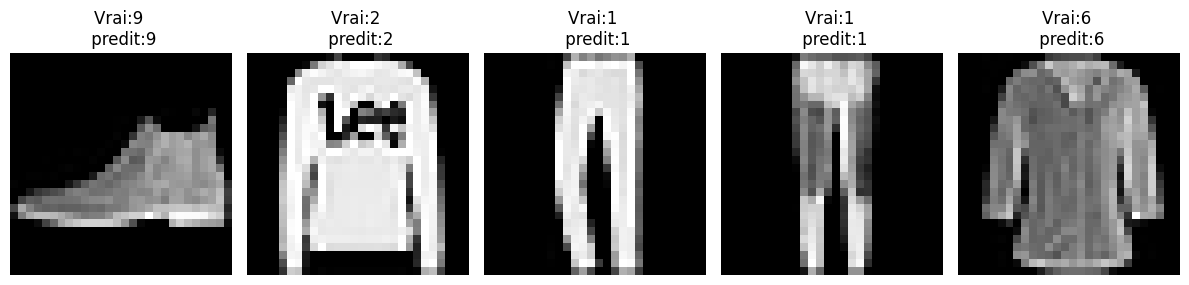

In [ ]:
predictions=model.predict(X_test)

plt.figure(figsize=(12,8))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Vrai:{y_test[i]} \n predit:{np.argmax(predictions[i])}")
  plt.axis('off')
plt.tight_layout()
plt.show()


**1. Le modèle fait-il des erreurs ? Sur quelles images ?**
Le modèle n'a fait aucune erreur sur ces 5 images , toutes ces prédictions sont **correctes**

**2. Comment expliquer une prédiction erronée ?**

Expliquer une prédiction erronée implique souvent d'examiner l'image elle-même pour détecter une éventuelle ambiguïté, de considérer si le modèle a été suffisamment exposé à ce type d'exemple pendant l'entraînement, d'évaluer les limitations potentielles de l'architecture du modèle, ou d'identifier la présence de bruit ou de déformations.

**3. Quelle technique permettrait d’améliorer la précision (ex : CNN) ?**

Pour améliorer la précision sur des tâches de classification d'images, les Réseaux de Neurones Convolutionnels (CNNs) sont très efficaces car ils exploitent la structure spatiale des images. D'autres techniques incluent l'augmentation de données, le réglage fin des hyperparamètres, la régularisation (comme le Dropout) et l'utilisation de l'arrêt précoce.

# **Exercice 2 : classification d’images en utilisant le dataset Fashion-MNIST**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

#pour le reproductibilité
tf.random.set_seed(42)

#chargement du dataset
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


***Étape 1 – Exploration du jeu de données***

**A.Dimensions et types**

In [ ]:
print("Dimensions du train set:",X_train.shape)
print("Dimensions du test set:",X_test.shape)

Dimensions du train set: (60000, 28, 28)
Dimensions du test set: (10000, 28, 28)


**B.Visualisation d'exemples**

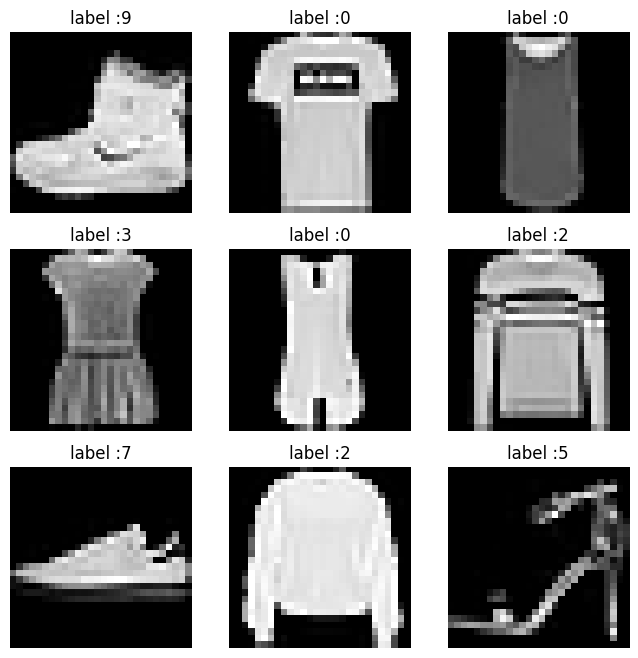

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(f"label :{y_train[i]}")
  plt.axis('off')
plt.show()

D'après la visualisation des échantillons du dataset Fashion-MNIST et les informations sur sa structure, on constate que :
- les données sont des images en niveaux de gris, chacune ayant une taille de 28x28 pixels. Ces images représentent différents articles de vêtements..
- Le dataset est divisé en un ensemble d'entraînement contenant 60 000 images et un ensemble de test contenant 10 000 images.

# **Étape 2 – Prétraitement des données**

In [ ]:
from tensorflow.keras.utils import to_categorical

#normalisation des pixels entre 0 et 1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255


#encodage one-hot des labels
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)


**Pourquoi faut-il normaliser les images ?**
Pour simplifier les calculs notamment le calcul du gradient

In [ ]:
import pandas as pd

valeurs=pd.Series(y_train).value_counts().sort_index()
print(valeurs)

#les donnees sont stratifiées

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64


**Quelle est l’importance du one-hot encoding dans un problème de classification multiclasse ?**

En utilisant `pd.Series(y_train).value_counts().sort_index()` nous avons constaté que les labels de sortie pour le dataset Fashion-MNIST sont des nombres entiers allant de 0 à 9, représentant les différentes catégories de vêtements.

L'**encodage one-hot** transforme ces labels entiers en vecteurs binaires. Pour 10 classes, un label comme '2' deviendrait un vecteur de longueur 10 avec un '1' à la position correspondant à la classe 2 et des '0' partout ailleurs (par exemple, `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`).

Cela est utile pour: **éviter l'ordre implicite :** Si le réseau de neurones utilisait les labels entiers directement, il pourrait interpréter qu'il existe une relation d'ordre ou une hiérarchie entre les classes (par exemple, que la classe 3 est "plus grande" que la classe 2). Dans le cas des vêtements, il n'y a pas d'ordre naturel .

# **Étape 3 – Création d’un modèle dense (ANN)**

**Création du modèle de base**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout


model=Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Compilation et entraînement**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(
    X_train,y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7361 - loss: 0.7430 - val_accuracy: 0.8560 - val_loss: 0.4030
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8474 - loss: 0.4243 - val_accuracy: 0.8597 - val_loss: 0.3858
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8595 - loss: 0.3874 - val_accuracy: 0.8687 - val_loss: 0.3614
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8682 - loss: 0.3618 - val_accuracy: 0.8729 - val_loss: 0.3602
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8724 - loss: 0.3464 - val_accuracy: 0.8742 - val_loss: 0.3543
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8778 - loss: 0.3323 - val_accuracy: 0.8780 - val_loss: 0.3417
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8794 - loss: 0.3210 - val_accuracy: 0.8808 - val_loss: 0.3302
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8865 - loss: 0.3040 -

**Visualisation**

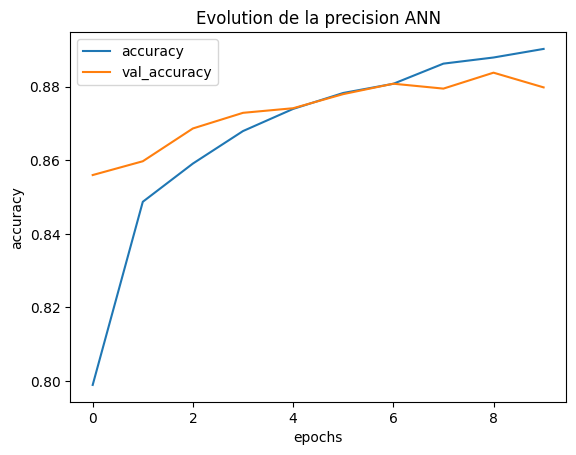

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Evolution de la precision ANN')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

1.  **Pourquoi utilise-t-on la fonction d’activation ReLU ici ?**
    ReLU est utilisée dans les couches cachées pour introduire de la non-linéarité, essentielle pour apprendre des motifs complexes dans les images, et pour son efficacité de calcul, aidant à prévenir le problème du gradient évanescent.

2.  **Quelle est la différence entre accuracy et val_accuracy ?**
    `accuracy` est la précision sur les données d'entraînement (vues), tandis que `val_accuracy` est la précision sur les données de validation (non vues), servant à estimer la capacité de généralisation du modèle et à détecter le surapprentissage.

3.  **Que se passe-t-il si l’on augmente le nombre d’époques à 50 ?**
    Augmenter les époques permettrait potentiellement plus d'apprentissage, mais augmente fortement le risque de surapprentissage, où la performance sur les données invisibles (`val_accuracy`) se dégraderait malgré une amélioration sur les données d'entraînement (`accuracy`).

**Évaluation finale :**

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test_cat)
print("Test loss:",test_loss)
print("Test accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.3496
Test loss: 0.35921454429626465
Test accuracy: 0.8708999752998352


# **Étape 4 — Introduction aux Fonctions d’Activation**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


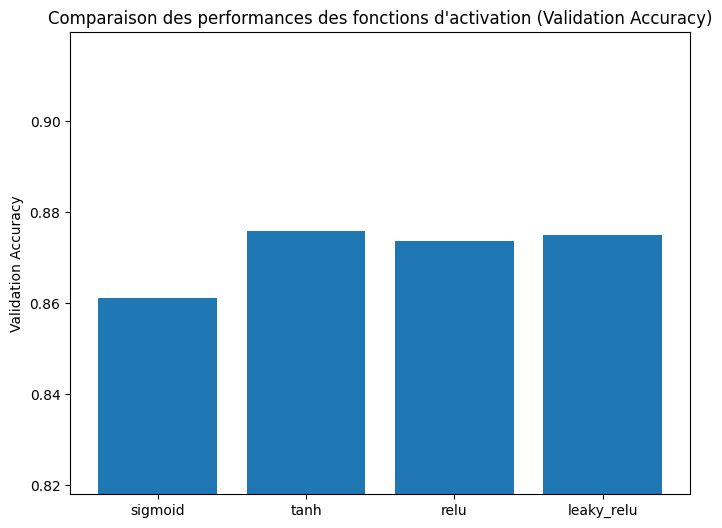

In [ ]:
from tensorflow.keras.layers import LeakyReLU
activations=["sigmoid","tanh","relu"]
results={}

for act in activations:
  model_act=Sequential([
      Input(shape=(28,28)),
      Flatten(),
      Dense(128,activation=act),
      Dense(64,activation=act),
      Dense(10,activation='softmax')
  ])

  model_act.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  history_act=model_act.fit(
      X_train,y_train_cat,
      epochs=5,
      batch_size=128,
      validation_split=0.2,
      verbose=0
  )
  results[act]=history_act.history['val_accuracy'][-1]



model_leaky=Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(10,activation='softmax')
])

model_leaky.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

h=model_leaky.fit(X_train,y_train_cat,epochs=5,batch_size=128,validation_split=0.2,verbose=0)
results['leaky_relu']=h.history['val_accuracy'][-1]


plt.figure(figsize=(8, 6))
plt.bar(results.keys(),results.values())
plt.title("Comparaison des performances des fonctions d'activation (Validation Accuracy)")
plt.ylabel("Validation Accuracy")
plt.ylim(min(results.values()) * 0.95, max(results.values()) * 1.05) # Adjust y-axis limits for better visualization
plt.show()

1. Quelle fonction d’activation donne les meilleurs résultats ?
2. Pourquoi les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées ?
3. À quoi sert LeakyReLU ?

1.  **Quelle fonction d’activation donne les meilleurs résultats ?**
    D'après le graphique à barres, la fonction d'activation `tanh` semble donner une précision de validation légèrement supérieure aux autres fonctions (`sigmoid`, `relu`, `leaky_relu`) sur ce modèle et avec 5 époques d'entraînement. Cependant, les différences sont minimes dans ce cas précis.

2.  **Pourquoi les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées ?**
    Les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées des réseaux profonds car elles souffrent du problème du **gradient évanescent**, où les gradients deviennent très petits pour les entrées éloignées de zéro. Cela ralentit considérablement l'apprentissage des premières couches pendant la rétropropagation.

3.  **À quoi sert LeakyReLU ?**
    `LeakyReLU` est une variante de ReLU. Elle sert à résoudre le problème des "neurones morts" que peut rencontrer ReLU (où les neurones qui reçoivent une entrée négative deviennent inactifs). LeakyReLU permet un petit gradient non nul pour les entrées négatives, ce qui aide les neurones à rester actifs et peut améliorer l'apprentissage.

# **Étape 5 : Modèle CNN (Convolutional Neural Network)**

**Création du modèle CNN**

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

#reshape pour ajouter la dimension 'canal'
X_train_cnn=X_train.reshape(-1,28,28,1)
X_test_cnn=X_test.reshape(-1,28,28,1)

cnn=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
])

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Entrainement**

In [ ]:
history_cnn=cnn.fit(
    X_train_cnn,y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.6689 - loss: 0.9214 - val_accuracy: 0.8559 - val_loss: 0.4133
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.8502 - loss: 0.4202 - val_accuracy: 0.8723 - val_loss: 0.3482
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.8706 - loss: 0.3589 - val_accuracy: 0.8852 - val_loss: 0.3126
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.8838 - loss: 0.3219 - val_accuracy: 0.8864 - val_loss: 0.3033
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.8924 - loss: 0.2985 - val_accuracy: 0.8935 - val_loss: 0.2854
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.8988 - loss: 0.2768 - val_accuracy: 0.8969 - val_loss: 0.2778
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.9048 - loss: 0.2616 - val_accuracy: 0.8979 - val_loss: 0.2722
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9102 - loss: 0.2442 

1. Quelle est la différence entre un ANN et un CNN ?
2. Pourquoi le CNN donne-t-il généralement de meilleurs résultats ?
3. Quel est le rôle des couches de Pooling ?

1.  **Quelle est la différence entre un ANN et un CNN ?**
    Un ANN (Artificial Neural Network) traite les données aplaties (vecteurs unidimensionnels), tandis qu'un CNN (Convolutional Neural Network) est spécifiquement conçu pour traiter les données structurées spatialement comme les images, en utilisant des couches de convolution et de pooling pour extraire des caractéristiques.

2.  **Pourquoi le CNN donne-t-il généralement de meilleurs résultats ?**
    Les CNNs donnent de meilleurs résultats sur les tâches d'image car ils exploitent la structure spatiale des pixels, apprennent automatiquement une hiérarchie de caractéristiques (des bords aux objets complexes) et sont plus robustes aux variations spatiales (translation, rotation).

3.  **Quel est le rôle des couches de Pooling ?**
    Les couches de Pooling (comme MaxPooling) réduisent la dimensionnalité spatiale des cartes de caractéristiques en résumant l'information dans des régions (par exemple, en prenant le maximum). Cela permet de réduire le nombre de paramètres, de rendre le modèle plus robuste aux petites translations et déformations, et de concentrer l'information la plus importante.

**Étape 6 — Visualisation des performances**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


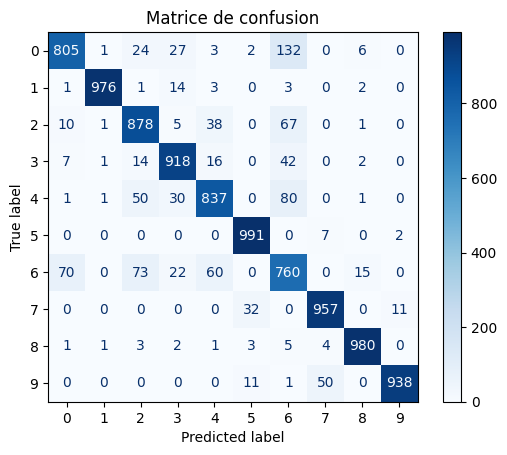

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

y_pred=np.argmax(cnn.predict(X_test_cnn),axis=1)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

1. **Quelles classes sont le plus souvent confondues?**
D'après la matrice de confusion  les classes les plus souvent confondues sont :

La classe 0 (T-shirt/top) est souvent confondue avec la classe 6 (Shirt).

On observe aussi des confusions entre la classe 2 (Pullover) et les classes 4 (Coat) et 6 (Shirt).




**2.Comment peut-on réduire ces erreurs de classification ?**

Pour réduire les erreurs de classification, notamment entre les classes souvent confondues (comme le T-shirt et la Chemise), on peut améliorer le modèle en utilisant des architectures de CNN plus performantes,
**augmenter la diversité des données**(augmentation de données ciblée).

# **Étape 7 : Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1
    )

datagen.fit(X_train_cnn)

cnn.fit(
    datagen.flow(X_train_cnn,y_train_cat,batch_size=128),
    epochs=10,
    validation_data=(X_test_cnn,y_test_cat)
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.8808 - loss: 0.3227 - val_accuracy: 0.9069 - val_loss: 0.2620
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.8909 - loss: 0.2966 - val_accuracy: 0.9011 - val_loss: 0.2686
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.8962 - loss: 0.2783 - val_accuracy: 0.9102 - val_loss: 0.2562
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.8990 - loss: 0.2671 - val_accuracy: 0.9098 - val_loss: 0.2511
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9048 - loss: 0.2610 - val_accuracy: 0.9094 - val_loss: 0.2704
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9045 - loss: 0.2544 - val_accuracy: 0.9095 - val_loss: 0.2559
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9062 - loss: 0.2481 - val_accuracy: 0.9089 - val_loss: 0.2576
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9107 - loss: 0.2387 - val

**1. Quel est l’intérêt de la Data Augmentation ?**

La **Data Augmentation** est une technique qui consiste à créer de nouvelles images d'entraînement à partir des images existantes en appliquant des transformations aléatoires (comme des rotations, zooms, translations). Son intérêt principal est d'augmenter la taille et la diversité de l'ensemble d'entraînement pour améliorer la capacité du modèle à généraliser à de nouvelles données et réduire le surapprentissage.

**2. Quels types de transformations semblent les plus efficaces pour ce dataset ?**
Pour le dataset Fashion-MNIST, les transformations qui simulent de légères variations spatiales tout en préservant l'identité de l'article sont les plus efficaces. Cela inclut des rotations, zooms et translations légers, ainsi que potentiellement des retournements horizontaux pour les articles symétriques. Ces transformations aident le modèle à mieux généraliser aux variations rencontrées dans les images réelles.